In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/KelvinKilonzo97/Medical-Price-Prediction_/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#shape of the datset
df.shape

(1338, 7)

In [5]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#data description
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
#duplicate values
df.duplicated().sum()

1

In [10]:
#show duplicates
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
#drop duplicates and keep first
df=df.drop_duplicates(keep='first')

In [12]:
#duplicate values check
df.duplicated().sum()

0

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


c:\Users\Kelvin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


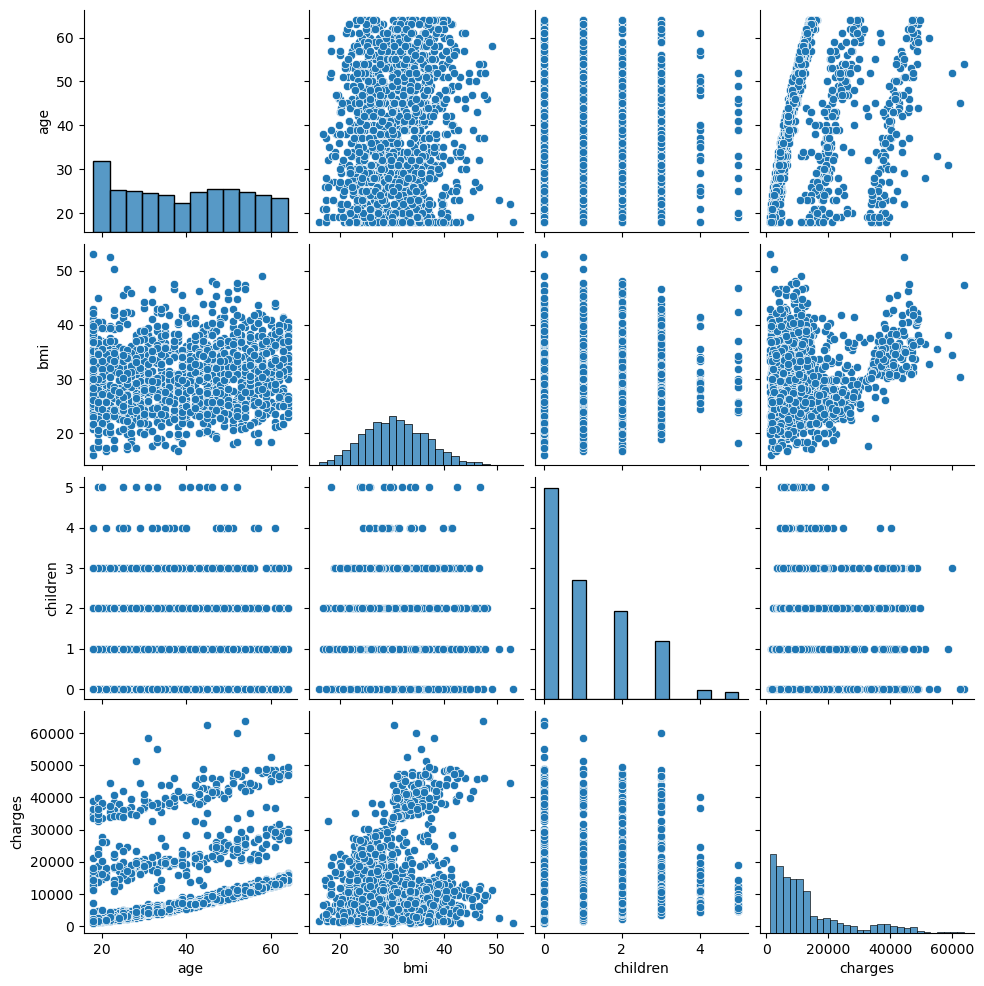

In [14]:
#pairplot
import seaborn as sns
sns.pairplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x292c5602990>,
 'caps': [<matplotlib.lines.Line2D at 0x292c5644350>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c4e25050>],
 'medians': [<matplotlib.lines.Line2D at 0x292c5645410>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c4d43690>],
 'means': []}

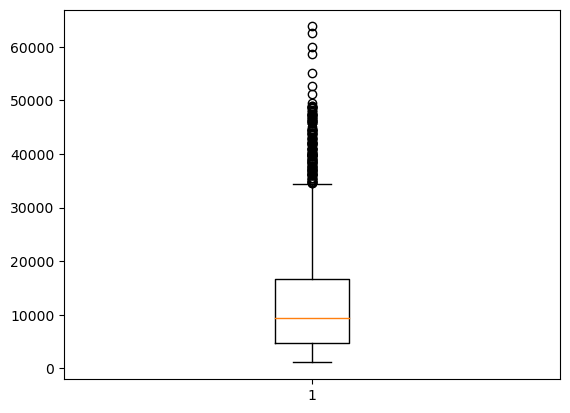

In [15]:
#outliers for numerical variables
import matplotlib.pyplot as plt
plt.boxplot(df.charges)

{'whiskers': [<matplotlib.lines.Line2D at 0x292c569fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x292c5601490>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c569f510>],
 'medians': [<matplotlib.lines.Line2D at 0x292c56aa250>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c56aa910>],
 'means': []}

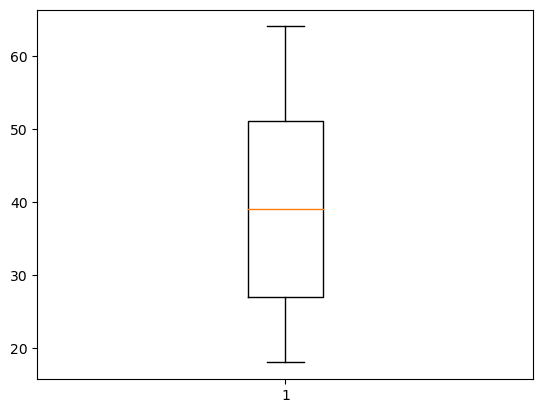

In [16]:
#boxplot
plt.boxplot(df.age)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

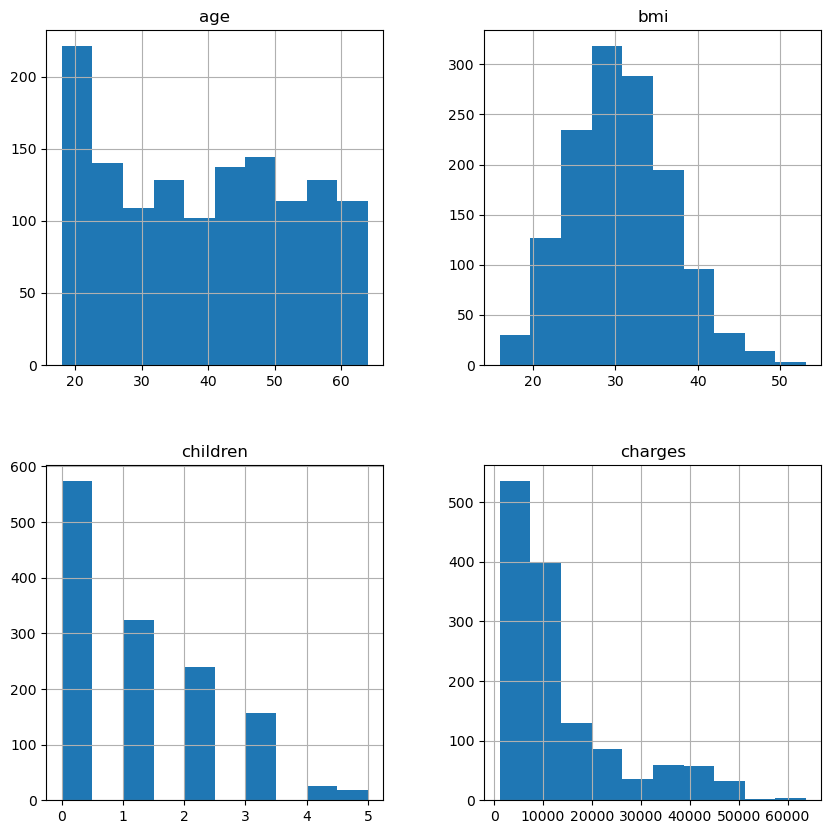

In [17]:
#numerical variables distributions
df.hist(figsize=(10,10))

In [18]:
# categorical variables
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['sex', 'smoker', 'region'], dtype='object')

In [19]:
#numerical variables
num_var=df.select_dtypes(include='number').columns
num_var

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [20]:
#corr of num_var
df[num_var].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


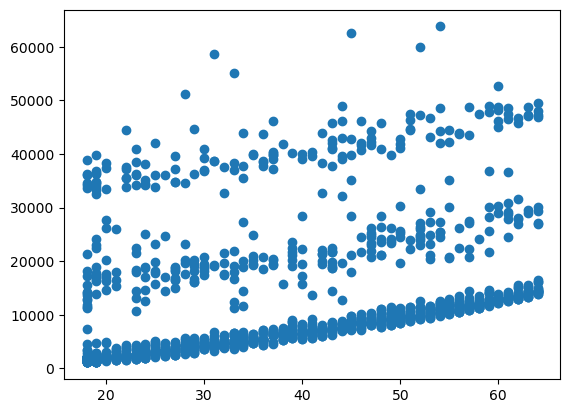

In [21]:
#scatter plot of age and charges
plt.scatter(df['age'],df['charges'])


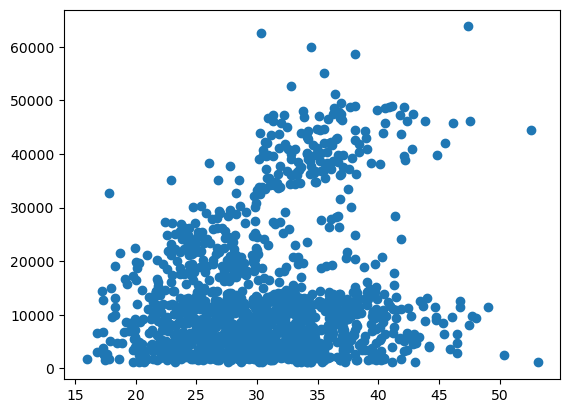

In [22]:
#scatter plot of bmi and charges
plt.scatter(df['bmi'],df['charges'])

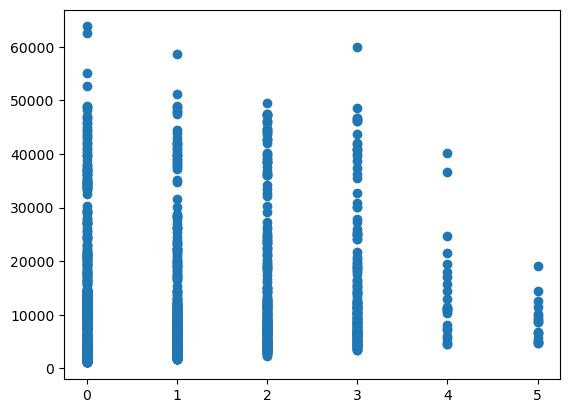

In [23]:
#scatter plot of charges and children
plt.scatter(df['children'],df['charges'])

<Axes: >

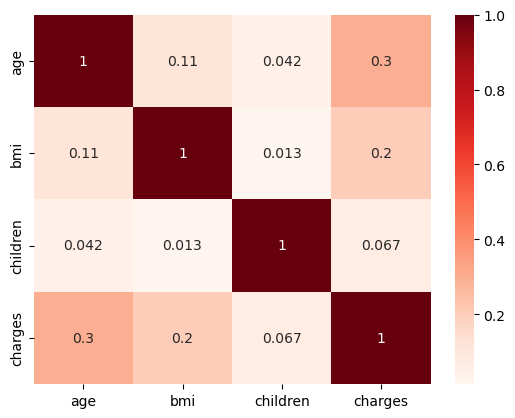

In [24]:
#heatmap with red as high
import seaborn as sns
sns.heatmap(df[num_var].corr(),annot=True,cmap='Reds')

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
#label encode categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_var:
  df[i]=le.fit_transform(df[i])

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Machine Learning Modelling

In [29]:
#split the data
from sklearn.model_selection import train_test_split
X=df.drop('charges',axis=1)
y=df['charges']

In [30]:
#scale the features using min max
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)

In [31]:
#first five rows of features
X[:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.66666667],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.33333333],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.33333333]])

In [32]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
#model evaluation
from sklearn.metrics import mean_squared_error,r2_score
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)


MSE: 35493102.61165049
RMSE: 5957.608799816458
R2: 0.8068466322629113


In [35]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
#model evaluation
from sklearn.metrics import mean_squared_error,r2_score
y_pred=dt.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MSE: 37760979.39909071
RMSE: 6144.996289591289
R2: 0.7945048529628661


In [37]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
#model evaluation
from sklearn.metrics import mean_squared_error,r2_score
y_pred=rf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)


MSE: 21073553.266933557
RMSE: 4590.5939993571155
R2: 0.885317780521136


In [39]:
# saving the random forest model
import pickle
pickle.dump(rf,open('random_forest_model.pkl','wb'))